<a href="https://colab.research.google.com/github/haithemml/Machine-Learning-with-Python/blob/master/congestive_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
data = pd.read_csv('congestive-heart.csv')
data.tail()

,Indicator Id,Dimension List,Time Frame,Numeric Value,Missing Value Flag,Locale Id,Locale,Locale Level,Locale State FIPS Code,Locale County FIPS Code,Locale HRR Code
5,416026854,Aged 75 years and over,2013,2034.0,NaN,1.0,Alabama,State,1.0,1.0,NaN
6,416027011,Aged <65 years,2013,NaN,NaN,101.0,Alabama - Autauga,County,1.0,1001.0,NaN
7,416027012,Aged 65-74 years,2013,NaN,NaN,101.0,Alabama - Autauga,County,1.0,1001.0,NaN
8,416027013,Aged 75 years and over,2013,NaN,NaN,101.0,Alabama - Autauga,County,1.0,1001.0,NaN
9,416027014,Aged <65 years,2013,NaN,NaN,102.0,Alabama - Baldwin,County,1.0,1003.0,NaN


In [4]:
data.describe()

,Indicator Id,Time Frame,Numeric Value,Missing Value Flag,Locale Id,Locale State FIPS Code,Locale County FIPS Code,Locale HRR Code
count,1.000000e+01,10.0,6.000000,0.0,7.000000,7.0,7.000000,0.0
mean,4.160269e+08,2013.0,1188.000000,NaN,58.285714,1.0,572.714286,NaN
std,8.315508e+01,0.0,635.489103,NaN,53.587045,0.0,534.790213,NaN
min,4.160268e+08,2013.0,637.000000,NaN,1.000000,1.0,1.000000,NaN
25%,4.160269e+08,2013.0,765.000000,NaN,1.000000,1.0,1.000000,NaN
50%,4.160269e+08,2013.0,881.000000,NaN,101.000000,1.0,1001.000000,NaN
75%,4.160270e+08,2013.0,1696.750000,NaN,101.000000,1.0,1001.000000,NaN
max,4.160270e+08,2013.0,2034.000000,NaN,102.000000,1.0,1003.000000,NaN


In [8]:
data.info

<bound method DataFrame.info of    Indicator Id  ... Locale HRR Code
0     416026849  ...             NaN
1     416026850  ...             NaN
2     416026851  ...             NaN
3     416026852  ...             NaN
4     416026853  ...             NaN
5     416026854  ...             NaN
6     416027011  ...             NaN
7     416027012  ...             NaN
8     416027013  ...             NaN
9     416027014  ...             NaN

[10 rows x 11 columns]>

In [5]:
index_with_nan = data.index[data.isnull().any(axis=1)]
print(index_with_nan)


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [12]:
print(data['Numeric Value'])

0     867.0
1     637.0
2    1964.0
3     895.0
4     731.0
5    2034.0
6       NaN
7       NaN
8       NaN
9       NaN
Name: Numeric Value, dtype: float64


In [13]:
print(data['Numeric Value'].isnull())

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
Name: Numeric Value, dtype: bool


In [17]:
missing_values = ["NaN"]
data = pd.read_csv("congestive-heart.csv", na_values=missing_values)

In [21]:
cnt = 0
for row in data['Numeric Value']:
  try:
    int(row)
    data.loc[cnt, 'Numeric Value'] = np.nan
  except  ValueError:
      pass
      cnt+=1

In [22]:
print(data.isnull().sum())

Indicator Id                0
Dimension List              0
Time Frame                  0
Numeric Value               5
Missing Value Flag         10
Locale Id                   3
Locale                      0
Locale Level                0
Locale State FIPS Code      3
Locale County FIPS Code     3
Locale HRR Code            10
dtype: int64


In [23]:
print(data.isnull().values.any())

True


In [24]:
print(data.isnull().sum().sum())

34


In [25]:
data['Numeric Value'].fillna(25, inplace=True)

In [26]:
data.loc[2, 'Numeric Values'] = 25

In [27]:
median = data['Numeric Value'].median()
data['Numeric Value'].fillna(median, inplace=True)

In [28]:
data['Numeric Value'].head()

0      25.0
1     637.0
2    1964.0
3     895.0
4     731.0
Name: Numeric Value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


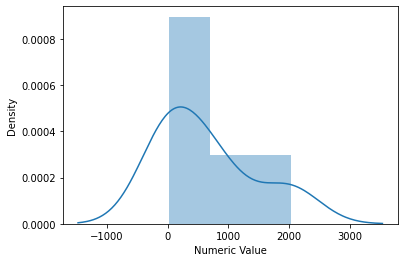

In [36]:
sns.distplot(data['Numeric Value'])

In [37]:
print("Skewness: %f" % data['Numeric Value'].skew())
print("Kurtosis: %f" % data['Numeric Value'].kurt())

Skewness: 1.088115
Kurtosis: -0.151482


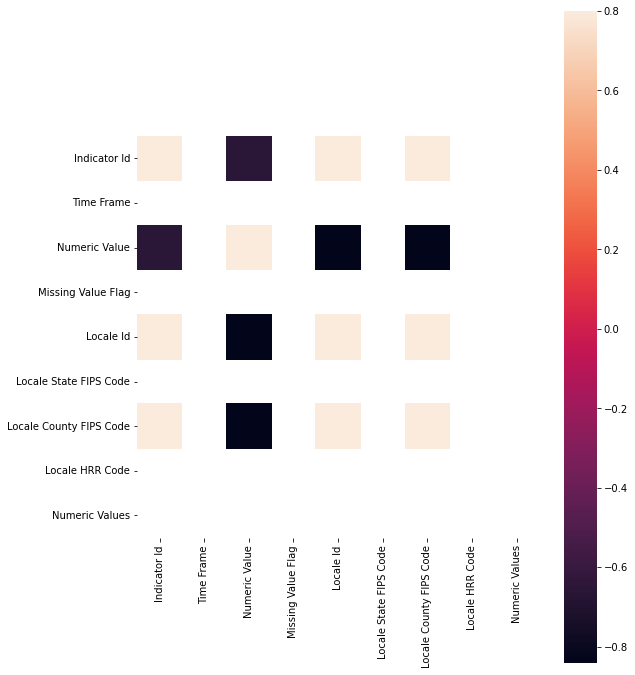

In [43]:
corr = data.corr()
f, ax = plt.subplots(figsize=(9, 12))
sns.heatmap(corr, vmax=.8, square=True)

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder(handle_unknown='ignore')
X = [['County', 1], ['State', 2]]
ohe.fit(X)


OneHotEncoder(handle_unknown='ignore')